In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
city_data = pd.read_csv('data.csv')
cities = pd.read_csv('restaurants.csv')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Изучение данных

In [3]:
city_data.head()

,City,Date,Temperature,Fuel_Price,Unemployment,IsHoliday
0,1,05-02-10,42.31,2.572,8.106,False
1,1,12-02-10,38.51,2.548,8.106,True
2,1,19-02-10,39.93,2.514,8.106,False
3,1,26-02-10,46.63,2.561,8.106,False
4,1,05-03-10,46.50,2.625,8.106,False


In [4]:
cities.head()

,City,Size
0,1,151315
1,2,202307
2,3,37392
3,4,205863
4,5,34875


In [5]:
train_data.head()

,City,Restaurant,Date,Weekly_Sales,IsHoliday
0,1,1,05-02-10,24924.50,False
1,1,1,12-02-10,46039.49,True
2,1,1,19-02-10,41595.55,False
3,1,1,26-02-10,19403.54,False
4,1,1,05-03-10,21827.90,False


Объединю данные, чтобы вся информация была в одном датасете.

In [6]:
city_joined = city_data.join(cities.set_index('City'), on='City')

train = train_data.join(city_joined.set_index(['City','Date']), on=['City','Date'], how='left', rsuffix='_other')
train.drop(['IsHoliday_other'], axis=1, inplace=True)

#параллельно так же модифицирую тестовые данные
test = test_data.join(city_joined.set_index(['City','Date']), on=['City','Date'], how='left', rsuffix='_other')
test.drop(['IsHoliday_other'], axis=1, inplace=True)

In [7]:
train.head()

,City,Restaurant,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,Unemployment,Size
0,1,1,05-02-10,24924.50,False,42.31,2.572,8.106,151315
1,1,1,12-02-10,46039.49,True,38.51,2.548,8.106,151315
2,1,1,19-02-10,41595.55,False,39.93,2.514,8.106,151315
3,1,1,26-02-10,19403.54,False,46.63,2.561,8.106,151315
4,1,1,05-03-10,21827.90,False,46.50,2.625,8.106,151315


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137938 entries, 0 to 137937
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   City          137938 non-null  int64  
 1   Restaurant    137938 non-null  int64  
 2   Date          137938 non-null  object 
 3   Weekly_Sales  137938 non-null  float64
 4   IsHoliday     137938 non-null  bool   
 5   Temperature   137938 non-null  float64
 6   Fuel_Price    137938 non-null  float64
 7   Unemployment  137938 non-null  float64
 8   Size          137938 non-null  int64  
dtypes: bool(1), float64(4), int64(3), object(1)
memory usage: 8.6+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59611 entries, 0 to 59610
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          59611 non-null  int64  
 1   Restaurant    59611 non-null  int64  
 2   Date          59611 non-null  object 
 3   IsHoliday     59611 non-null  bool   
 4   Temperature   59611 non-null  float64
 5   Fuel_Price    59611 non-null  float64
 6   Unemployment  59611 non-null  float64
 7   Size          59611 non-null  int64  
dtypes: bool(1), float64(3), int64(3), object(1)
memory usage: 3.2+ MB


В данных нет пропусков в каких-либо колонках.

Посмотрим, как распределены данные по различным ресторанам:

In [10]:
train['Restaurant'].value_counts().values

array([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
       2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
       2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
       2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
       2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1997, 1989,
       1963, 1886, 1884, 1710, 1699, 1680, 1629, 1617, 1609, 1603, 1597,
       1557, 1476, 1392, 1001,  916,  854,  678,  593,  271,  166,  108,
         53,    6,    4], dtype=int64)

У большинства ресторанов ровно по 2000 записей, но есть и такие, где по 6-4 сэмпла — на этих данных предсказания могут быть менее точными.

Данные по городам распределены +- равномерно:

In [11]:
train['City'].value_counts().values

array([7336, 7248, 7177, 7169, 7157, 7143, 7137, 7100, 7018, 7010, 6926,
       6921, 6862, 6855, 6814, 6764, 6510, 6314, 6302, 6175], dtype=int64)

<AxesSubplot:xlabel='IsHoliday', ylabel='count'>

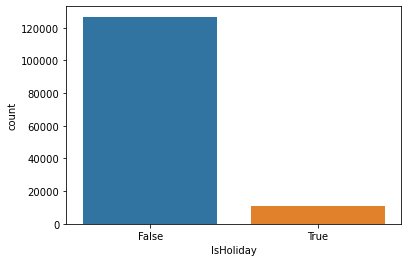

In [12]:
sns.countplot(x=train_data['IsHoliday'])

Значений `IsHoliday = True` не очень много, не уверена, что они будут весомым признаком.

### Исследуем таргет:

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Count'>

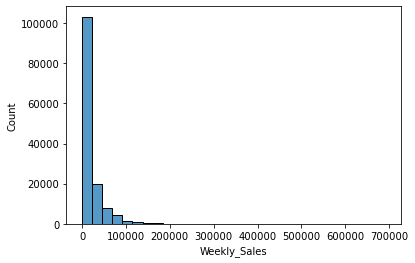

In [13]:
sns.histplot(x=train['Weekly_Sales'], bins = 30)

Здесь мы видим экспоненциальное распределение, что не очень хорошо. На вход алгоритму хотелось бы подавать что-то более нормально распределенное.

Можно использовать логарифмирование, но тогда есть проблема с убыточными ресторанами — от их отрицательной выручки логарифм взять нельзя.

Можно попробовать прибавить ко всем выручкам в датасете самую минимальную, так они все станут неотрицательными, и еще сразу прибавить малую величину *0.001*, чтобы не брать лог от нуля.

Тогда алгоритм тоже будет предсказывать логарифмы выручки, и чтобы привести их в нормальный вид, надо будет проводить обратную операцию. Правда, для обратной операции надо где-то запоминать минимальное значение, которое мы прибавляем. 

Здесь нас ждет проблема, потому что мы не можем знать минимальное значение у реальных данных — его просто неоткуда взять. Если все-таки предположить, что значение таргета на тестовых данных будут распределены примерно так же, как на тренировочных, то в качестве величины смещения можно взять, например, помноженное на два минимальное значение из тренировочного датасета.

In [14]:
offset_train_general = np.abs(train['Weekly_Sales'].min())*2
train['sales_log'] = np.log(train['Weekly_Sales'] + offset_train_general + 0.001)
# когда будем делить этот датасет на трейн и тест перед обучением, перерассчитаем эту колонку
# чтобы искать минимум выручки в трейне и тесте отдельно
# иначе получается что-то вроде data leakage)

<AxesSubplot:xlabel='sales_log', ylabel='Count'>

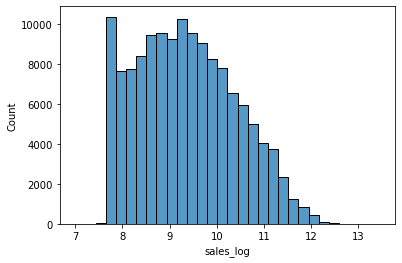

In [15]:
sns.histplot(x=train['sales_log'], bins = 30)

Далеко от идеального нормального распределения, но гораздно больше на него похоже и, возможно, будет восприниматься моделью лучше.

In [16]:
train.replace({False: 0, True: 1}, inplace=True)

# Не было идей, как применить дату
train.drop(['Date'],axis=1,inplace=True)

## Обучение

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import category_encoders as ce

from sklearn.ensemble import RandomForestRegressor

In [18]:
features = ['City', 'Restaurant', 'IsHoliday', 'Temperature', 'Fuel_Price', 'Unemployment', 'Size']
numeric = ['Temperature', 'Fuel_Price', 'Unemployment', 'Size']
categorical = ['City', 'Restaurant']

X_train, X_test, y_train, y_test = train_test_split(train[features], train['Weekly_Sales'], test_size=0.3, random_state=42)

### Random Forest, без логарифмирования таргета

In [19]:
rf_regr = RandomForestRegressor(n_estimators=100, bootstrap=True, n_jobs=-1, random_state=42)

In [20]:
rf_regr.fit(X_train, y_train)
rf_regr.score(X_test, y_test)

0.9160001818236833

Показатель R2 = *0.916* достаточно хороший. Можно еще попробовать нормализовать числовые признаки, хотя случайный лес и не требует обязательной нормализации данных.

In [21]:
ct_steps = [('num_preprocess', StandardScaler(), numeric)]
ct = ColumnTransformer(ct_steps, remainder='passthrough')

rf_regr_pipe = Pipeline([('preprocess', ct),
                         ('rf', rf_regr)])

rf_regr_pipe.fit(X_train, y_train)
rf_regr_pipe.score(X_test, y_test)

0.9160533473837329

Метрика незначительно увеличилась. 

Так как признаки `City` и `Restaurant` категориальные и номинальные, возможно, имеет смысл их как-то по иному закодировать.
OHE не подойдет, так как это породит 20 колонок из `City` и еще около 100 из `Restaurant`.
Попробовала HashingEncoder, ничего не получилось хорошего, попробовала TargerEncoder:

In [22]:
ct_steps.append(('cat_preprocess', ce.TargetEncoder(cols=categorical, verbose=0, smoothing=1.0, min_samples_leaf=1), categorical))
ct = ColumnTransformer(ct_steps, remainder='passthrough')

rf_regr_pipe = Pipeline([('preprocess', ct),
                         ('rf', rf_regr)])

rf_regr_pipe.fit(X_train, y_train)
rf_regr_pipe.score(X_test, y_test)

C:\Users\masha\anaconda3\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\masha\anaconda3\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
C:\Users\masha\anaconda3\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\masha\anaconda3\lib\site-packages\category_encoders\target_e

0.9216182333679476

(Поставила `verbose=0`, но варнинги все равно выскакивают)

Таргет-кодирование увеличило метрику, на нем пока и остановимся.

### Добавим логарифмирование таргета

In [23]:
offset_train = np.abs(y_train.min())*2
offset_test = np.abs(y_test.min())*2
y_train_log = np.log(y_train + offset_train)
y_test_log = np.log(y_test + offset_test)

In [24]:
rf_regr_pipe.fit(X_train, y_train_log)
rf_regr_pipe.score(X_test, y_test_log)

C:\Users\masha\anaconda3\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\masha\anaconda3\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


0.9684179842683683

Видно, что этот прием значительно повысил метрику.
Сравним, какие результаты получились бы с логарифмированием, но без предобработки данных:

In [25]:
rf_regr.fit(X_train, y_train_log)
rf_regr.score(X_test, y_test_log)

0.9667285141488181

Можно сделать вывод, что предобработка улучшает работу алгоритма, но незначительно.

Возможно, еще немного улучшить перфоманс поможет тюнинг гиперпараметров.

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
rf_params = {'n_estimators':[20, 50, 100, 150], 
             'max_depth':[None, 3, 6, 10],
             'max_features': ['sqrt', 'log2', None, 0.5, 0.8]}

ct.fit_transform(X_train, y_train_log)
model = RandomForestRegressor()
grid_search = GridSearchCV(model, rf_params)
grid_search.fit(X_train, y_train_log)

grid_search.best_params_

C:\Users\masha\anaconda3\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\masha\anaconda3\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


{'max_depth': None, 'max_features': 0.8, 'n_estimators': 150}

In [28]:
rf_regr_pipe = Pipeline([('preprocess', ct),
                         ('rf', RandomForestRegressor(n_estimators=100, max_depth=None, max_features=0.8, random_state=42))])

rf_regr_pipe.fit(X_train, y_train_log)
rf_regr_pipe.score(X_test, y_test_log)

C:\Users\masha\anaconda3\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\masha\anaconda3\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


0.9682046494886805

## Попробуем еще градиентный бустинг

In [29]:
from xgboost import XGBRegressor

In [30]:
xgb_regr_pipe = Pipeline([('preprocess', ct),
                         ('xgbr', XGBRegressor(random_state=42, n_jobs=-1))])

xgb_regr_pipe.fit(X_train, y_train_log)
xgb_regr_pipe.score(X_test, y_test_log)

C:\Users\masha\anaconda3\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\masha\anaconda3\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


0.9405247509260278

XGBRegressor предсказывает немного хуже, чем случайный лес.

Без предварительной обработки данных бустинг дает результат чуть лучше:

In [31]:
xgb_regr = XGBRegressor(random_state=42, n_jobs=-1)
xgb_regr.fit(X_train, y_train_log)

xgb_regr.score(X_test, y_test_log)

0.9486026344977855

## Заполнение test.csv

<AxesSubplot:ylabel='Count'>

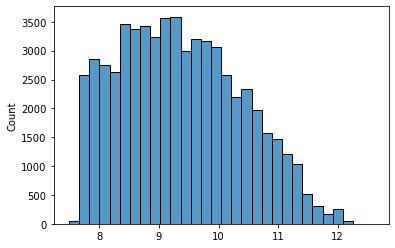

In [32]:
test.replace({False: 0, True: 1}, inplace=True)
test.drop(['Date'],axis=1,inplace=True)

y_test_log = rf_regr_pipe.predict(test[features])
sns.histplot(y_test_log, bins=30)

<AxesSubplot:ylabel='Count'>

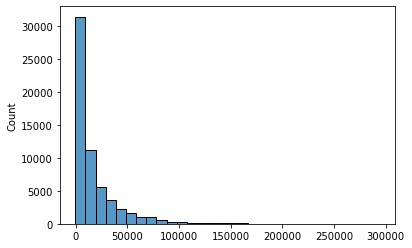

In [33]:
y_test_transformed = np.exp(y_test_log) - offset_train_general
sns.histplot(y_test_transformed, bins=30)

Мы видим, что распределение предсказанного таргета повторяет распределение на тренировочных данных. Осталось дополнить этой колонкой датасет.

In [34]:
test_data['Weekly_Sales'] = np.round(y_test_transformed,2)
test_data.to_csv('test_with_predictions.csv', header=True, index=False)

## Почему не рассматривались линейные модели?

У числовых признаков не наблюдается значительной линейной зависимости с таргетом (как изначальным, так и логарифмированным).

<AxesSubplot:>

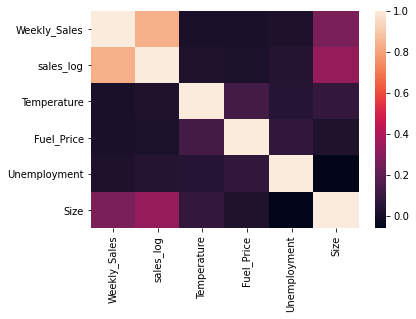

In [35]:
numeric = ['Weekly_Sales','sales_log','Temperature','Fuel_Price', 'Unemployment', 'Size']
sns.heatmap(train[numeric].corr(method='pearson'))

## Выводы

Было проведено исследование данных. Самым интересным наблюдением стало распределение таргета)

Немного за кадром прошла оценка целесообразности использования линейных моделей (выше объяснила, почему я их не выбрала) (на всякий случай я попробовала некоторые модели SVM для регресии, но результаты у них были значительно хуже, так что решила даже не включать это в репорт).

Следующими проверяла работу случайного леса и градиентого бустинга, первый алгоритм дал метрику повыше, но и бустинг, думаю, можно было бы потюнить и немного повысить.

На данных, отложенных для тестирования модели, наивысший достиженный `R2` был *0.968*.